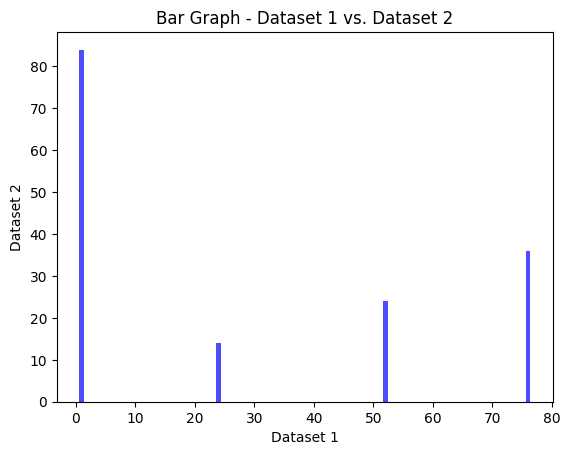

In [10]:
import statistics
import tkinter as tk
from tkinter import ttk
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def calculate_statistics(dataset1, dataset2, operation):
    if operation == "Mean":
        result1 = statistics.mean(dataset1)
        result2 = statistics.mean(dataset2)
    elif operation == "Mode":
        result1 = statistics.mode(dataset1)
        result2 = statistics.mode(dataset2)
    elif operation == "Variance":
        result1 = statistics.variance(dataset1)
        result2 = statistics.variance(dataset2)
    elif operation == "Standard Deviation":
        result1 = statistics.stdev(dataset1)
        result2 = statistics.stdev(dataset2)
    elif operation == "Median":
        result1 = statistics.median(dataset1)
        result2 = statistics.median(dataset2)
    elif  operation == 'Bar Graph':
        generate_bar_graph(dataset1, dataset2)     
        return
    else:
        result1 = "Invalid Operation"
        result2 = "Invalid Operation"

    result_label.config(text=f"Result: {result1} and {result2}")

def generate_bar_graph(dataset1, dataset2):
    # Clear the previous graph (if any)
    for widget in root.winfo_children():
        if isinstance(widget, FigureCanvasTkAgg):
            widget.get_tk_widget().destroy()

    fig, ax = plt.subplots()

    ax.bar(dataset1, dataset2, color='blue', alpha=0.7)
    ax.set_xlabel('Dataset 1')
    ax.set_ylabel('Dataset 2')
    ax.set_title('Bar Graph - Dataset 1 vs. Dataset 2')

    # Embed the Matplotlib figure in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.grid(row=4, column=0, columnspan=len(operations), pady=5)

    # Draw the figure
    canvas.draw()


# Create a function to handle button click
def button_click(operation):
    result_label.config(text="Calculating...")

    # Get the dataset values from the entry widgets
    dataset1_str = dataset1_entry.get()
    dataset2_str = dataset2_entry.get()

    # Convert the string values to floats (you may need to use int or float depending on your data)
    dataset1 = [float(x) for x in dataset1_str.split(",")]
    dataset2 = [float(x) for x in dataset2_str.split(",")]

    # Call the calculate_statistics function with the converted datasets
    calculate_statistics(dataset1, dataset2, operation)

    

# Create the main GUI window
root = tk.Tk()
root.title("Dataset Statistics Calculator")

# Create entry widgets for the datasets
dataset1_label = tk.Label(root, text="Dataset 1:")
dataset1_label.grid(row=0, column=0, padx=5, pady=5, sticky="e")

dataset1_entry = tk.Entry(root)
dataset1_entry.grid(row=0, column=1, padx=5, pady=5)

dataset2_label = tk.Label(root, text="Dataset 2:")
dataset2_label.grid(row=1, column=0, padx=5, pady=5, sticky="e")

dataset2_entry = tk.Entry(root)
dataset2_entry.grid(row=1, column=1, padx=5, pady=5)

# Create buttons for each operation horizontally
operations = ["Mean", "Mode", "Median", "Variance", "Standard Deviation", "Bar Graph"]

for i, operation in enumerate(operations):
    button = ttk.Button(
        root, text=operation, command=lambda op=operation: button_click(op)
    )
    button.grid(row=2 + i//3, column=i % 3, padx=5, pady=5, sticky="nsew")

    
# Create a label to display the result
result_label = tk.Label(root, text="Result:")
result_label.grid(row=2 + len(operations)//3, column=0, columnspan=3, pady=5)

# Center-align all columns
for i in range(3):
    root.grid_columnconfigure(i, weight=1)

# Center-align the label
result_label.grid(sticky="nsew")

# Run the main loop
root.mainloop()